In [3]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd
from fa2 import ForceAtlas2

# Week 5

## Part A: Let's Visualize!

In [6]:
with open('../week4/character_graph', 'rb') as f:
  G = pickle.load(f)

In [7]:
print(G.number_of_nodes())
print(G.number_of_edges())

541
1624


In [5]:
CC = nx.weakly_connected_components(G)
lc = max(CC, key=len)
CG = G.subgraph(lc).copy()

Building a simple visualization

In [6]:
UCG = CG.to_undirected()

In [7]:
import matplotlib.pyplot as plt
# create number for each group to allow use of colormap
from itertools import count

# Color mapping for nodes
node_colors = []
for n in UCG.nodes:
  role = UCG.nodes[n]['role']
  if role == "Ally":
    node_colors.append((1,0.5,0.81,1))
  elif role == "Enemy":
    node_colors.append((0.98,0.75,0.32,1))
  else:
    node_colors.append((0.23,0.55,0.98,1))

# Color mapping for edges
edge_colors = []
for e in UCG.edges:
  role1 = UCG.nodes[e[0]]['role']
  role2 = UCG.nodes[e[1]]['role']
  if e[0] == "Link":
    edge_colors.append((0.3, 0.3, 0.3, 0.1))
  elif role1 == "Ally" and role2 == "Ally":
    edge_colors.append((1, 0.5, 0.81, 1))
  elif role1 == "Enemy" and role2 == "Enemy":
    edge_colors.append((0.98, 0.75, 0.32, 1))
  elif role1 == "Boss" and role2 == "Boss":
    edge_colors.append((0.23, 0.55, 0.98, 1))
  else:
    edge_colors.append((0.9, 0, 0, 0.8))


# Color mapping for nodes
# roles = set(nx.get_node_attributes(UCG,'role').values())
# mapping = dict(zip(sorted(roles),count()))
# nodes = UCG.nodes()
# colors = [mapping[UCG.nodes[n]['role']] for n in nodes]

# Degree-dependant node sizes
d = dict(UCG.degree)
node_sizes = [v * 10 for v in d.values()]

# Edge colors

edges = UCG.edges()
# edge_colors = [mapping[UCG.nodes[x]['role']] if (UCG.nodes[x]['role'] == UCG.nodes[y]['role']) else 0 for x,y in edges]

Stone Talus
Stone Talus
Stone Talus
Stone Talus
Stone Talus
Stone Talus
Stone Talus
Stone Talus
Stone Talus
Stone Talus
Stone Talus (Luminous)
Stone Talus (Luminous)
Stone Talus (Luminous)
Stone Talus (Rare)
Stone Talus (Rare)
Stone Talus (Rare)
Igneo Talus
Igneo Talus
Igneo Talus
Igneo Talus
Igneo Talus
Igneo Talus
Igneo Talus
Frost Talus
Frost Talus
Frost Talus
Frost Talus
Frost Talus
Hinox
Hinox
Hinox
Hinox
Hinox
Hinox
Hinox
Hinox
Hinox
Blue Hinox
Blue Hinox
Blue Hinox
Blue Hinox
Blue Hinox
Blue Hinox
Black Hinox
Black Hinox
Black Hinox
Black Hinox
Stalnox
Stalnox
Stalnox
Molduga
Molduga
Molduga
Molduga
Molduga
Igneo Talus Titan
Igneo Talus Titan
Igneo Talus Titan
Molduking
Molduking
Windblight Ganon
Windblight Ganon
Windblight Ganon
Windblight Ganon
Windblight Ganon
Windblight Ganon
Windblight Ganon
Fireblight Ganon
Fireblight Ganon
Fireblight Ganon
Fireblight Ganon
Fireblight Ganon
Fireblight Ganon
Thunderblight Ganon
Thunderblight Ganon
Thunderblight Ganon
Thunderblight Ganon
Thu

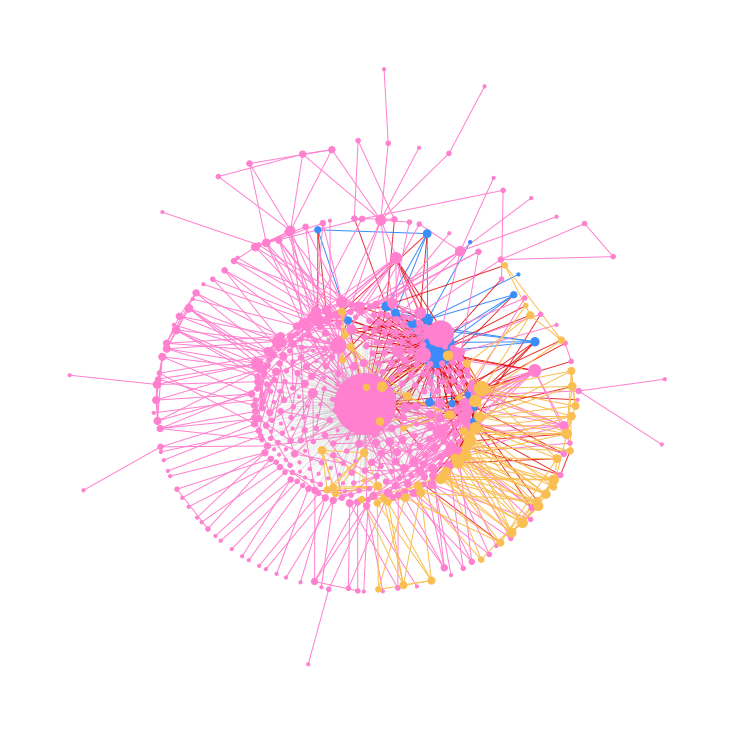

In [8]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(UCG, node_size=node_sizes, node_color=node_colors, edge_color=edge_colors)

In [9]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=0.1,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1,

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=0.1,

                        # Log
                        verbose=True)


positions = forceatlas2.forceatlas2_networkx_layout(UCG, pos=None, iterations=200)

100%|██████████| 200/200 [00:00<00:00, 276.44it/s]

BarnesHut Approximation  took  0.18  seconds
Repulsion forces  took  0.47  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


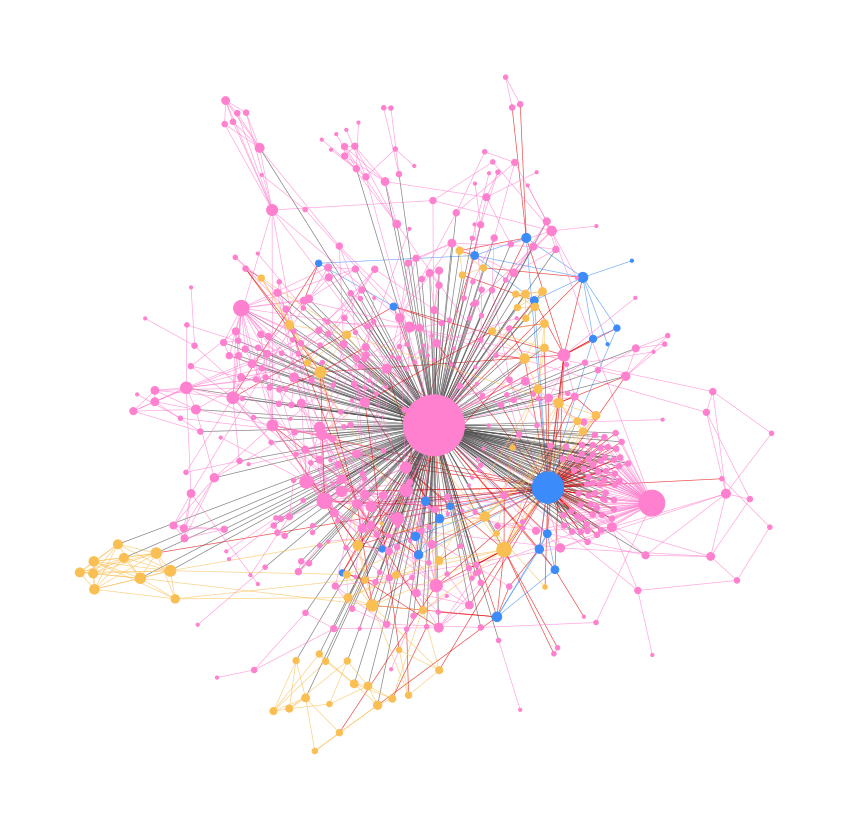

In [10]:
plt.figure(figsize=(15,15))

options = {
  "node_size": node_sizes,
  "node_color": node_colors,
}
nx.draw_networkx_nodes(UCG, positions, **options)

options = {
  "edge_color": edge_colors,
  "width": 0.7,
  "alpha": 0.7
}
nx.draw_networkx_edges(UCG, positions, **options)
# fig = plt.figure(figsize=(20,4))
plt.axis('off')
plt.show()

The large hub is clearly Link. There are some chains of connected nodes. There is an interesting group of enemies (bottom group of yellow nodes) that are relatively highly interconnected.

**Consider the top 3 nodes with highest in-degree in the network. Open the corresponding Zelda Wiki page.**

In [11]:
top3 = [ x for x,y in sorted(G.in_degree, key=lambda x: x[1])[-3:]]
nei = G.neighbors(top3[0])
top3



for node in top3:
  print("\n")
  neighbors = G.neighbors(node, )
  print(f"Neighbors for {node}:")
  for n in neighbors:
    print(n)






Neighbors for Hylia:
Princess Zelda
Link
Impa


Neighbors for Calamity Ganon:
Dark Beast Ganon
Fireblight Ganon
Thunderblight Ganon
Waterblight Ganon
Windblight Ganon


Neighbors for Link:
Princess Zelda
Epona
Impa
Hylia
Old Man
Calamity Ganon
King Rhoam
Kass
Paya


Ganon corresponding to see also section pointing to other ganons

In [12]:
G.in_degree('Traysi')

2

Traysi, who has the highest out degree, only has an in degree of 2.

Could be becuase she is a significant charcater, so she will have a large out degree. But not significant enough to be mentioned in many other texts.

In [13]:
G.in_edges('Hylia')

InEdgeDataView([('Banji', 'Hylia'), ('Kapson', 'Hylia'), ('Link', 'Hylia'), ('Princess Zelda', 'Hylia'), ('Kah Mael', 'Hylia'), ("Ke'nai Shakah", 'Hylia'), ('Tutsuwa Nima', 'Hylia'), ('Ze Kasho', 'Hylia'), ('Ritaag Zumo', 'Hylia'), ("Tu Ka'loh", 'Hylia'), ('Katosa Aug', 'Hylia'), ('Zuna Kai', 'Hylia'), ('Etsu Korima', 'Hylia'), ('Rohta Chigah', 'Hylia'), ('Ruvo Korbah', 'Hylia'), ('Yowaka Ita', 'Hylia'), ('Dah Kaso', 'Hylia'), ('Katah Chuki', 'Hylia'), ('Namika Ozz', 'Hylia'), ('Noya Neha', 'Hylia'), ("Saas Ko'sah", 'Hylia'), ("Maag No'rah", 'Hylia'), ('Mijah Rokee', 'Hylia'), ('Shira Gomar', 'Hylia'), ('Gorae Torr', 'Hylia'), ('Daag Chokah', 'Hylia'), ('Ketoh Wawai', 'Hylia'), ('Kuhn Sidajj', 'Hylia'), ('Maag Halan', 'Hylia'), ('Pumaag Nitae', 'Hylia'), ('Shae Katha', 'Hylia'), ('Shoqa Tatone', 'Hylia'), ('Dila Maag', 'Hylia'), ('Keive Tala', 'Hylia'), ("Korsh O'hu", 'Hylia'), ('Misae Suma', 'Hylia'), ('Raqa Zunzo', 'Hylia'), ('Takama Shiri', 'Hylia'), ('Tho Kayu', 'Hylia'), ('Keeha Y

They are the monks, and Hylia, and Calamity Ganon.

The monks are Sheikah

In [14]:
G.nodes['Keeha Yoog']

{'role': 'Ally', 'gender': 'Unknown', 'race': 'Sheikah', 'content-length': 217}

**What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?**

In [64]:
in_degrees = [d for v, d in CG.in_degree]
out_degrees = [d for v, d in CG.out_degree]

avg_in_deg = np.mean(in_degrees)
median_in_deg = np.median(in_degrees)
mode_in_deg = max(set(in_degrees), key=in_degrees.count)
min_in_deg = min(in_degrees)
max_in_deg = max(in_degrees)

avg_out_deg = np.mean(out_degrees)
median_out_deg = np.median(out_degrees)
mode_out_deg = max(set(out_degrees), key=out_degrees.count)
min_out_deg = min(out_degrees)
max_out_deg = max(out_degrees)

print(f"Average in-degree:\t {avg_in_deg} \t\tAverage out-degree:\t {avg_out_deg}")
print(f"Median in-degree:\t {median_in_deg} \t\t\t\tMedian out_degre:\t {median_out_deg}")
print(f"Mode in-degree:\t\t {mode_in_deg} \t\t\t\tMode out_degre:\t\t {mode_out_deg}")
print(f"Min in-degree:\t\t {min_in_deg} \t\t\t\tMin out_degre:\t\t {min_out_deg}")
print(f"Max in-degree:\t\t {max_in_deg} \t\t\t\tMax out_degre:\t\t {max_out_deg}")

Average in-degree:	 2.97678916827853 		Average out-degree:	 2.97678916827853
Median in-degree:	 1.0 				Median out_degre:	 3.0
Mode in-degree:		 0 				Mode out_degre:		 3
Min in-degree:		 0 				Min out_degre:		 0
Max in-degree:		 370 				Max out_degre:		 14


The average degrees are the same for the reason that every out degree serves as an in degree as well.

The fact that the mode of the in-degrees is 0 means that most characters are not referenced by any other characters.

In [72]:
# Filter graph nodes
# Create subgraph

CG.nodes.data()

NodeDataView({'Stone Talus': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Unknown', 'content-length': 546}, 'Stone Talus (Junior)': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Stone Talus', 'content-length': 20}, 'Stone Talus (Senior)': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Stone Talus', 'content-length': 20}, 'Stone Talus (Luminous)': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Stone Talus', 'content-length': 178}, 'Stone Talus (Rare)': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Stone Talus', 'content-length': 159}, 'Igneo Talus': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Unknown', 'content-length': 296}, 'Frost Talus': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Unknown', 'content-length': 183}, 'Hinox': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Unknown', 'content-length': 2220}, 'Blue Hinox': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Hinox', 'content-length': 296}, 'Black Hinox': {'role': 'Boss', 'gender': 'Unknown', 'race': 'Hinox', 'content-l